# IMPORTS AND GLOBALS

In [2]:
from typing import List
from ml_carbucks import DATA_DIR
from ml_carbucks.adapters.BaseDetectionAdapter import BaseDetectionAdapter
from ml_carbucks.adapters.EfficientDetAdapter import EfficientDetAdapter
from ml_carbucks.adapters.FasterRcnnAdapter import FasterRcnnAdapter
from ml_carbucks.adapters.UltralyticsAdapter import RtdetrUltralyticsAdapter, YoloUltralyticsAdapter

from ml_carbucks.utils.inference import plot_img_pred as ppp
from ml_carbucks.utils.preprocessing import create_clean_loader

adapters: List[BaseDetectionAdapter]=[
    YoloUltralyticsAdapter(
        classes=["scratch", "dent", "crack"],
        **{
            "img_size": 384,
            "batch_size": 32,
            "epochs": 27,
            "lr": 0.0015465639515144544,
            "momentum": 0.3628781599889685,
            "weight_decay": 0.0013127041660177367,
            "optimizer": "NAdam",
        },
        weights="/home/bachelor/ml-carbucks/results/ensemble_demos/trial_4_YoloUltralyticsAdaptermodel.pt",
    ),
    RtdetrUltralyticsAdapter(
        classes=["scratch", "dent", "crack"],
        **{
            "img_size": 384,
            "batch_size": 16,
            "epochs": 10,
            "lr": 0.0001141043015859849,
            "momentum": 0.424704619626319,
            "weight_decay": 0.00012292547851740234,
            "optimizer": "AdamW",
        },
        weights="/home/bachelor/ml-carbucks/results/ensemble_demos/trial_4_RtdetrUltralyticsAdaptermodel.pt",
    ),
    FasterRcnnAdapter(
        classes=["scratch", "dent", "crack"],
        **{
            "img_size": 384,
            "batch_size": 8,
            "epochs": 21,
            "lr_backbone": 2.6373762637681257e-05,
            "lr_head": 0.0011244046084737927,
            "weight_decay_backbone": 0.000796017512818448,
            "weight_decay_head": 0.0005747409908715994,
        },
        weights="/home/bachelor/ml-carbucks/results/ensemble_demos/trial_4_FasterRcnnAdaptermodel.pth",
    ),
    EfficientDetAdapter(
        classes=["scratch", "dent", "crack"],
        **{
            "img_size": 384,
            "batch_size": 8,
            "epochs": 26,
            "optimizer": "momentum",
            "lr": 0.003459928723120903,
            "weight_decay": 0.0001302610542371722,
        },
        weights="/home/bachelor/ml-carbucks/results/ensemble_demos/trial_4_EfficientDetAdaptermodel.pth",
    ),
]


# Code belows tests predictions from different adapters on the same image batch

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Plotting image with GT boxes


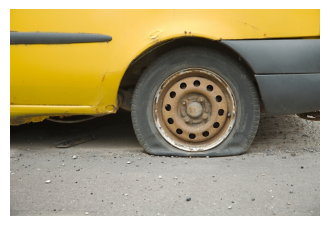

Using adapter: YoloUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:11 | Starting prediction...

0: 256x384 (no detections), 29.3ms
Speed: 0.8ms preprocess, 29.3ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 384)


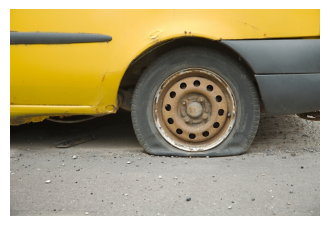

Using adapter: RtdetrUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:12 | Starting prediction...

0: 384x384 1 scratch, 15.6ms
Speed: 0.6ms preprocess, 15.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 384)


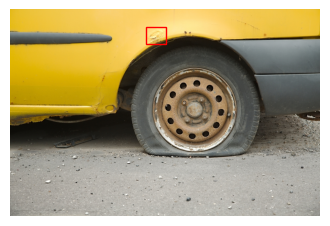

Using adapter: FasterRcnnAdapter


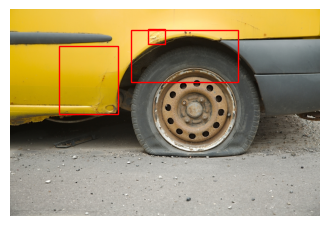

Using adapter: EfficientDetAdapter


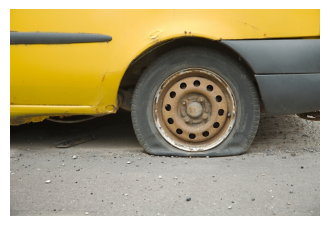

Plotting image with GT boxes


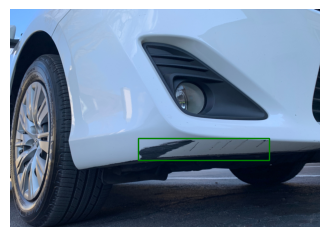

Using adapter: YoloUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:13 | Starting prediction...

0: 288x384 1 scratch, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 384)


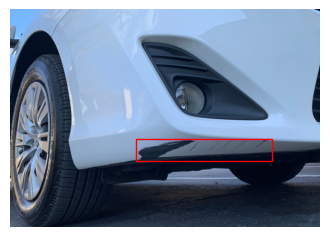

Using adapter: RtdetrUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:13 | Starting prediction...

0: 384x384 3 scratchs, 1 dent, 15.3ms
Speed: 0.7ms preprocess, 15.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 384)


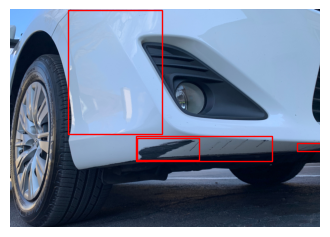

Using adapter: FasterRcnnAdapter


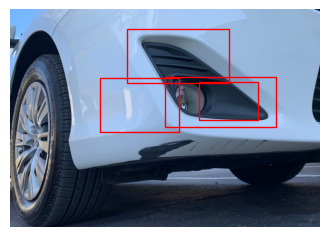

Using adapter: EfficientDetAdapter


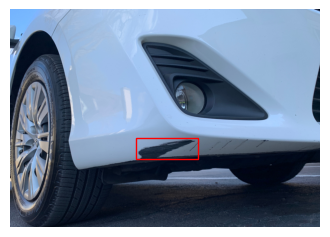

Plotting image with GT boxes


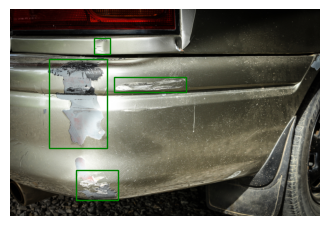

Using adapter: YoloUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:14 | Starting prediction...

0: 256x384 1 dent, 5.0ms
Speed: 0.5ms preprocess, 5.0ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 384)


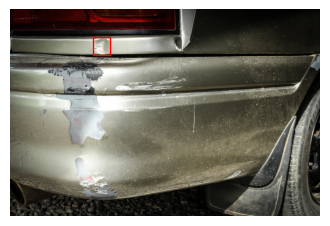

Using adapter: RtdetrUltralyticsAdapter
INFO ml_carbucks.adapters.UltralyticsAdapter 17:45:14 | Starting prediction...

0: 384x384 8 scratchs, 3 dents, 16.9ms
Speed: 0.6ms preprocess, 16.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 384)


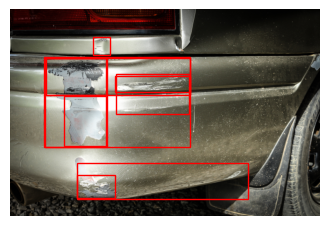

Using adapter: FasterRcnnAdapter


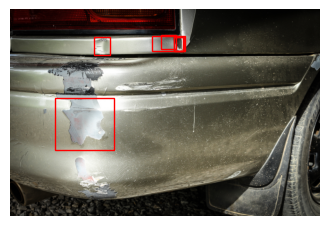

Using adapter: EfficientDetAdapter


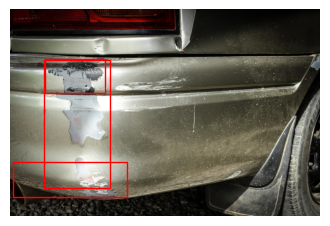

In [ ]:

# img_path = "/home/bachelor/ml-carbucks/data/car_dd_testing/images/val/000575.jpg"
# #load img as tensor
# from PIL import Image
# import torchvision.transforms as T
# img = Image.open(img_path).convert("RGB")
# transform = T.Compose([T.ToTensor()])
# batch_img_tensor = transform(img).unsqueeze(0)  # add batch dimension
# print("Plotting image with no predictions")
# ppp(batch_img_tensor[0], bboxes=[], coords="xyxy")


loader = create_clean_loader(
    datasets=[
        (
            DATA_DIR / "car_dd_testing" / "images" / "val",
            DATA_DIR / "car_dd_testing" / "instances_val_curated.json",
        )
    ],
    shuffle=False,
    batch_size=1,
    transforms=None
)

figsize=(4,4)
jjj = 3
for batch in loader:
    batch_img_tensor, batch_targets = batch  # we only need the images

    for iii in range(len(batch_img_tensor)):

        print("Plotting image with GT boxes")        
        ppp(batch_img_tensor[iii], bboxes=batch_targets[iii]['boxes'], coords="xyxy", figsize=figsize, color="green")

        for adapter in adapters:
            print(f"Using adapter: {adapter.__class__.__name__}")
            adapter.setup()
            predictions = adapter.predict(batch_img_tensor)
            # print(set(predictions[iii]['labels'].tolist()))
            ppp(batch_img_tensor[iii], bboxes=predictions[iii]['boxes'], coords="xyxy", figsize=figsize)
    jjj -= 1 
    if jjj == 0:
        break


# This code verifies and visualizes predictions from a SPECIFIC adapter

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Using adapter: FasterRcnnAdapter
{1, 2}
torch.Size([3, 667, 1000])


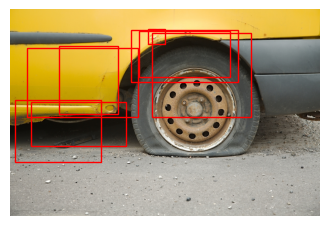

{1, 2}
torch.Size([3, 702, 1000])


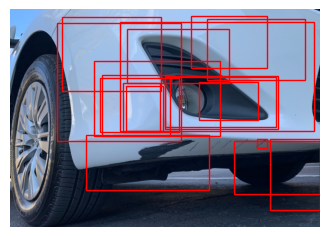

{1, 2}
torch.Size([3, 667, 1000])


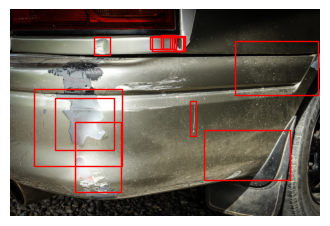

{1, 2}
torch.Size([3, 818, 1000])


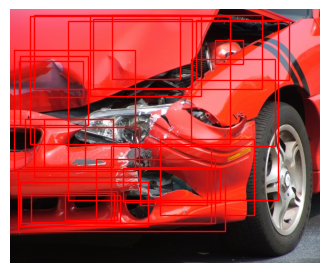

In [4]:
adapter_idx = 2
figsize=(4,4)
loader = create_clean_loader(
    datasets=[
        (
            DATA_DIR / "car_dd_testing" / "images" / "val",
            DATA_DIR / "car_dd_testing" / "instances_val_curated.json",
        )
    ],
    shuffle=False,
    batch_size=1,
    transforms=None
)
aaa = adapters[adapter_idx].clone()
aaa.setup()
jjj = 4
print(f"Using adapter: {aaa.__class__.__name__}")
for batch in loader:
    batch_img_tensor, batch_targets = batch  # we only need the images

    for iii in range(len(batch_img_tensor)):
        # predictions = aaa.predict(batch_img_tensor, iou_threshold=0.1, conf_threshold=0.2)
        predictions = aaa.predict(batch_img_tensor)
        print(set(predictions[iii]['labels'].tolist()))
        print(batch_img_tensor[iii].shape)
        ppp(batch_img_tensor[iii], bboxes=predictions[iii]['boxes'], coords="xyxy", figsize=figsize)
    jjj -= 1 
    if jjj == 0:
        break